<a href="https://colab.research.google.com/github/sindhuja-mulakeri/Netflix-movies-and-TV-shows-clustering-Unsupervised-learning/blob/main/Netfllix_Movies_and_TV_shows_Clustering_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='6px'><font color='Green'>**Project Name**    - <font color='cyan'>Netflix Movies & TV shows Clustering -Unsupervised Learning



##### **Project Type**    - **Unsupervised(Clustering)**
##### **Contribution**    - Team
##### **Team Member 1 -Sindhuja Mulakeri**
##### **Team Member 2 -Shubham Mishra**
##### **Team Member 3 -Aditi Jain**
##### **Team Member 4 -Devashish Sinha**


# **Project Summary -**
The main objective of this project is to analyze a dataset related to Netflix and cluster the content into meaningful groups. The dataset contains various attributes of Netflix shows and movies, such as title, genre, release year, duration, rating, and more. The process begins with preprocessing the dataset by handling missing values, removing irrelevant columns, and converting categorical variables into numerical representations. Feature engineering techniques may also be applied to extract valuable information.

Exploratory data analysis techniques will be used to gain insights into the dataset. Visualizations and statistical summaries will help understand variable distributions, identify trends, and explore relationships between different features.

Clustering algorithms like k-means, hierarchical clustering, or density-based spatial clustering will be employed to group similar Netflix content based on their attributes. Determining the optimal number of clusters will be done using techniques such as the elbow method or silhouette analysis.

After clustering, the results will be evaluated and interpreted to understand the common characteristics and patterns within each group. This analysis will provide valuable information for content categorization, recommendation systems, and content acquisition strategies for Netflix.

The findings and insights from the clustering analysis will be summarized and presented using visualizations, charts, and graphs. Recommendations may be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix to enhance user experience and content offerings.

In conclusion, this project focuses on analyzing a Netflix dataset, applying clustering techniques to group similar shows and movies, and providing insights and recommendations based on the clustering results. The project aims to improve the understanding of Netflix's content landscape and support decision-making processes within the company.

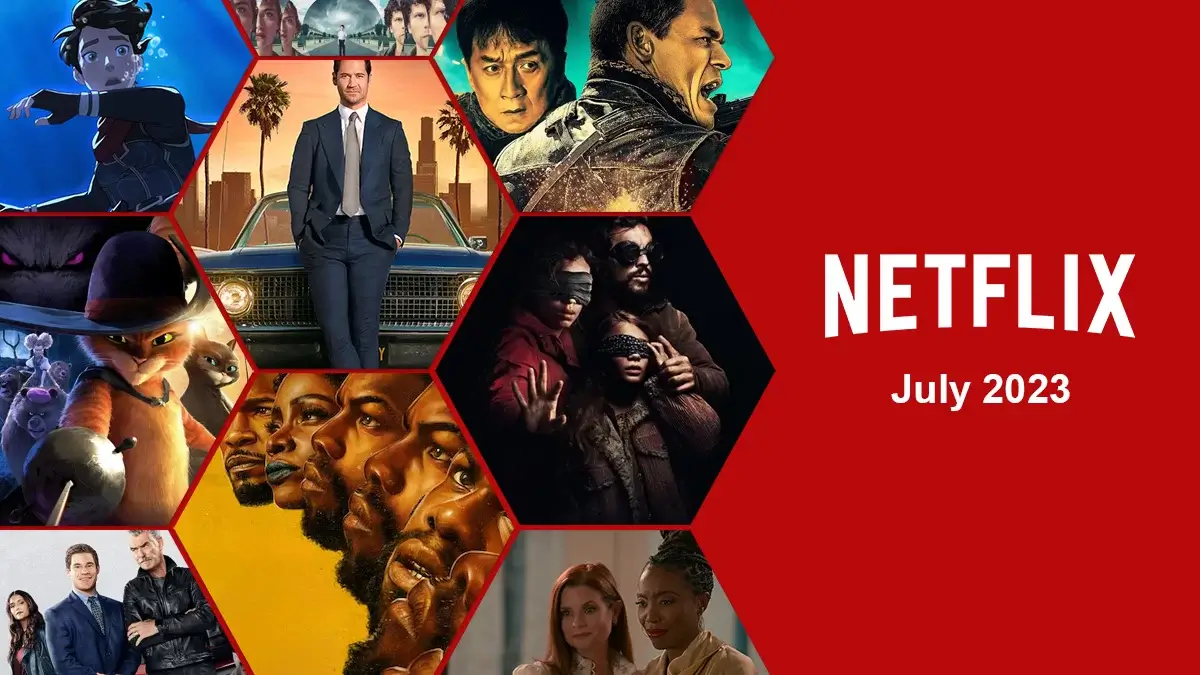

# **GitHub Link -**

Shubham Mishra:  https://github.com/Shubham-Mishra83/NetflixMovies_and_TVshows_UnsupervisedClusteringModel-.git

Sindhuja-https://github.com/sindhuja-mulakeri/Netflix-movies-and-TV-shows-clustering-Unsupervised-learning.git

Aditi-https://github.com/aditijain22/MachineLearning_Netflix_movies_and_tvshow_prediction

Devashish- https://github.com/devashish0211/Netflix-Movies-and-TV-shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [235]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.tokenize import TweetTokenizer

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [236]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
# Load Dataset
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [238]:
# Dataset First Look
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [239]:
#Dataset First Look
dataset.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [240]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [241]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [242]:
#total null values in the netflix Dataset
dataset.isnull().sum().sum()

3631

In [243]:
#checking dataset describe
dataset.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

#### Duplicate Values

In [244]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [245]:
# Missing Values/Null Values Count
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [246]:
# Checking null values after treatment.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Text(0, 0.5, 'Distance')

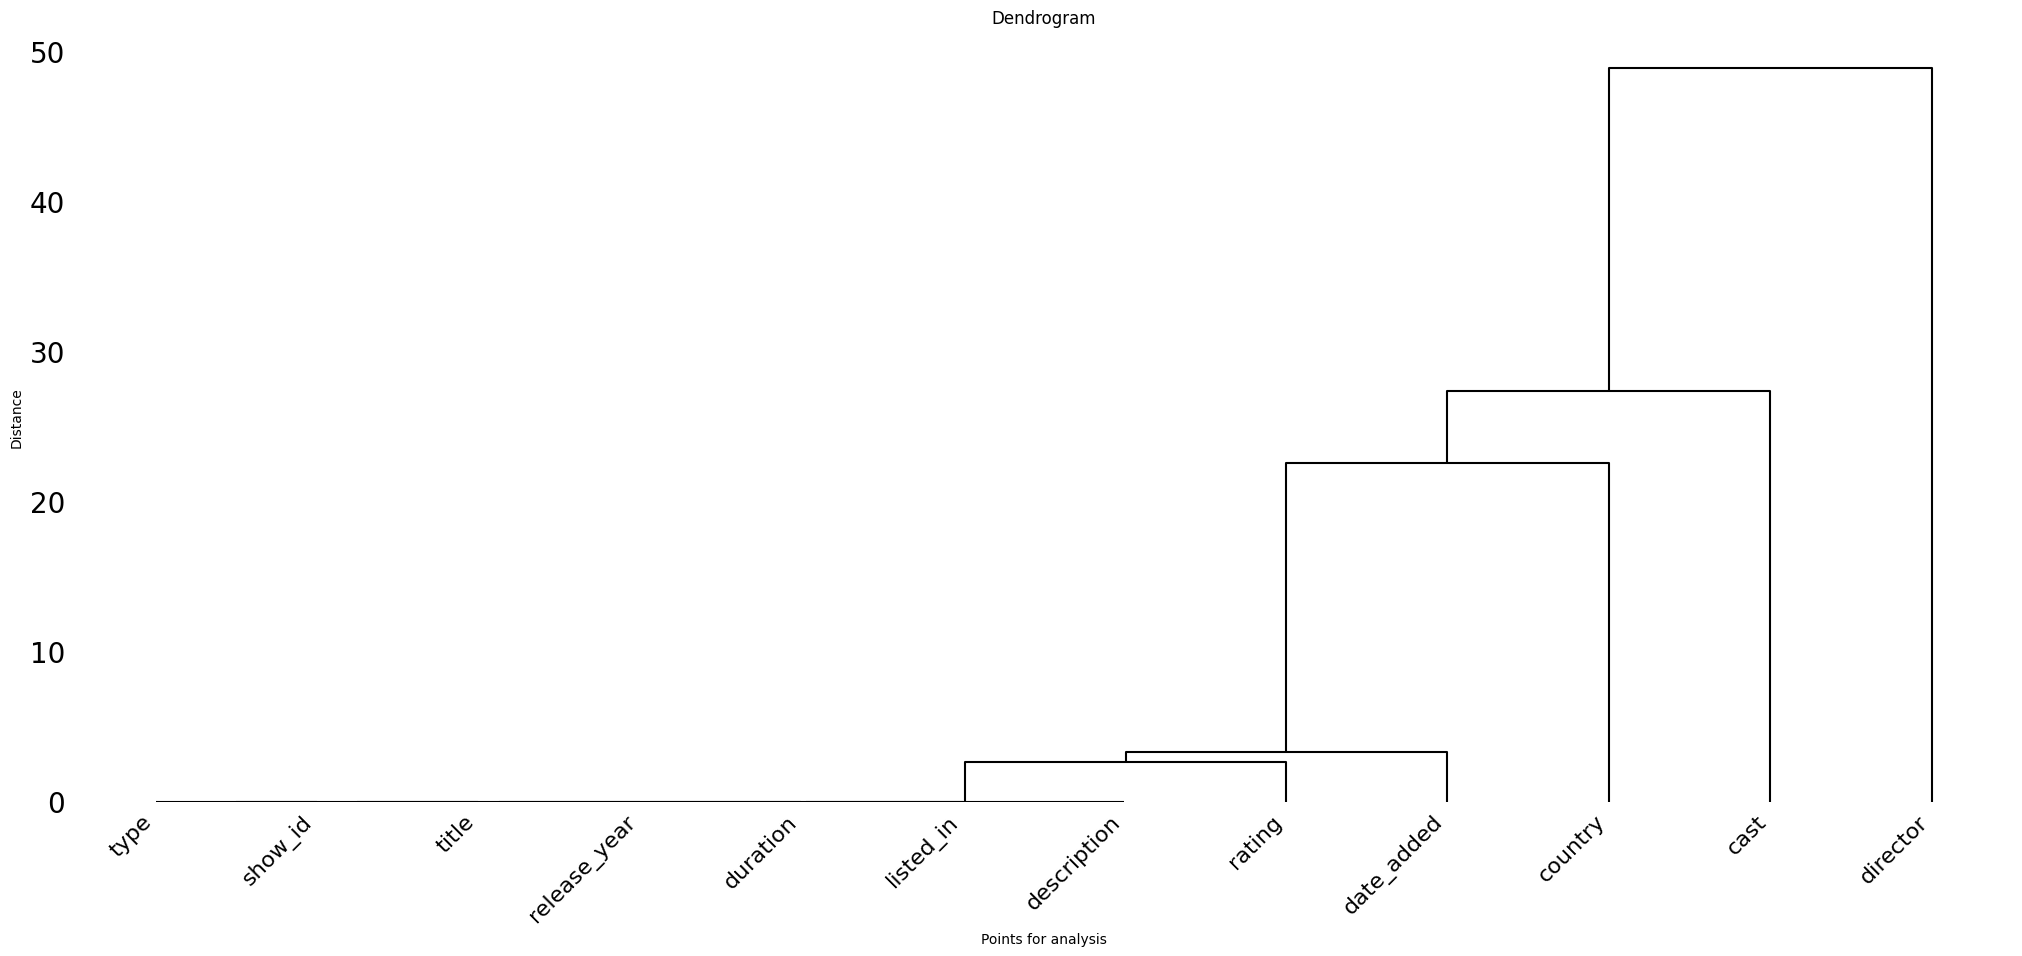

In [247]:
# Visualizing the missing values
import missingno as msno
msno.dendrogram(dataset,orientation='top')
plt.title('Dendrogram')
plt.xlabel('Points for analysis')
plt.ylabel('Distance')

The attributes "Director," "Cast," "Country," and "Rating" have a significant number of missing values, while "Show_ID," "Type," "Title," "Release_Year," "Duration," "Description," and "Listed_in" do not contain any missing values.

In [248]:
#Fill missing values in the dataset with a blank space (empty string)
dataset.fillna(value=' ',axis=0,inplace=True)

In [249]:
# Checking null values after treatment.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Text(0, 0.5, 'Distance')

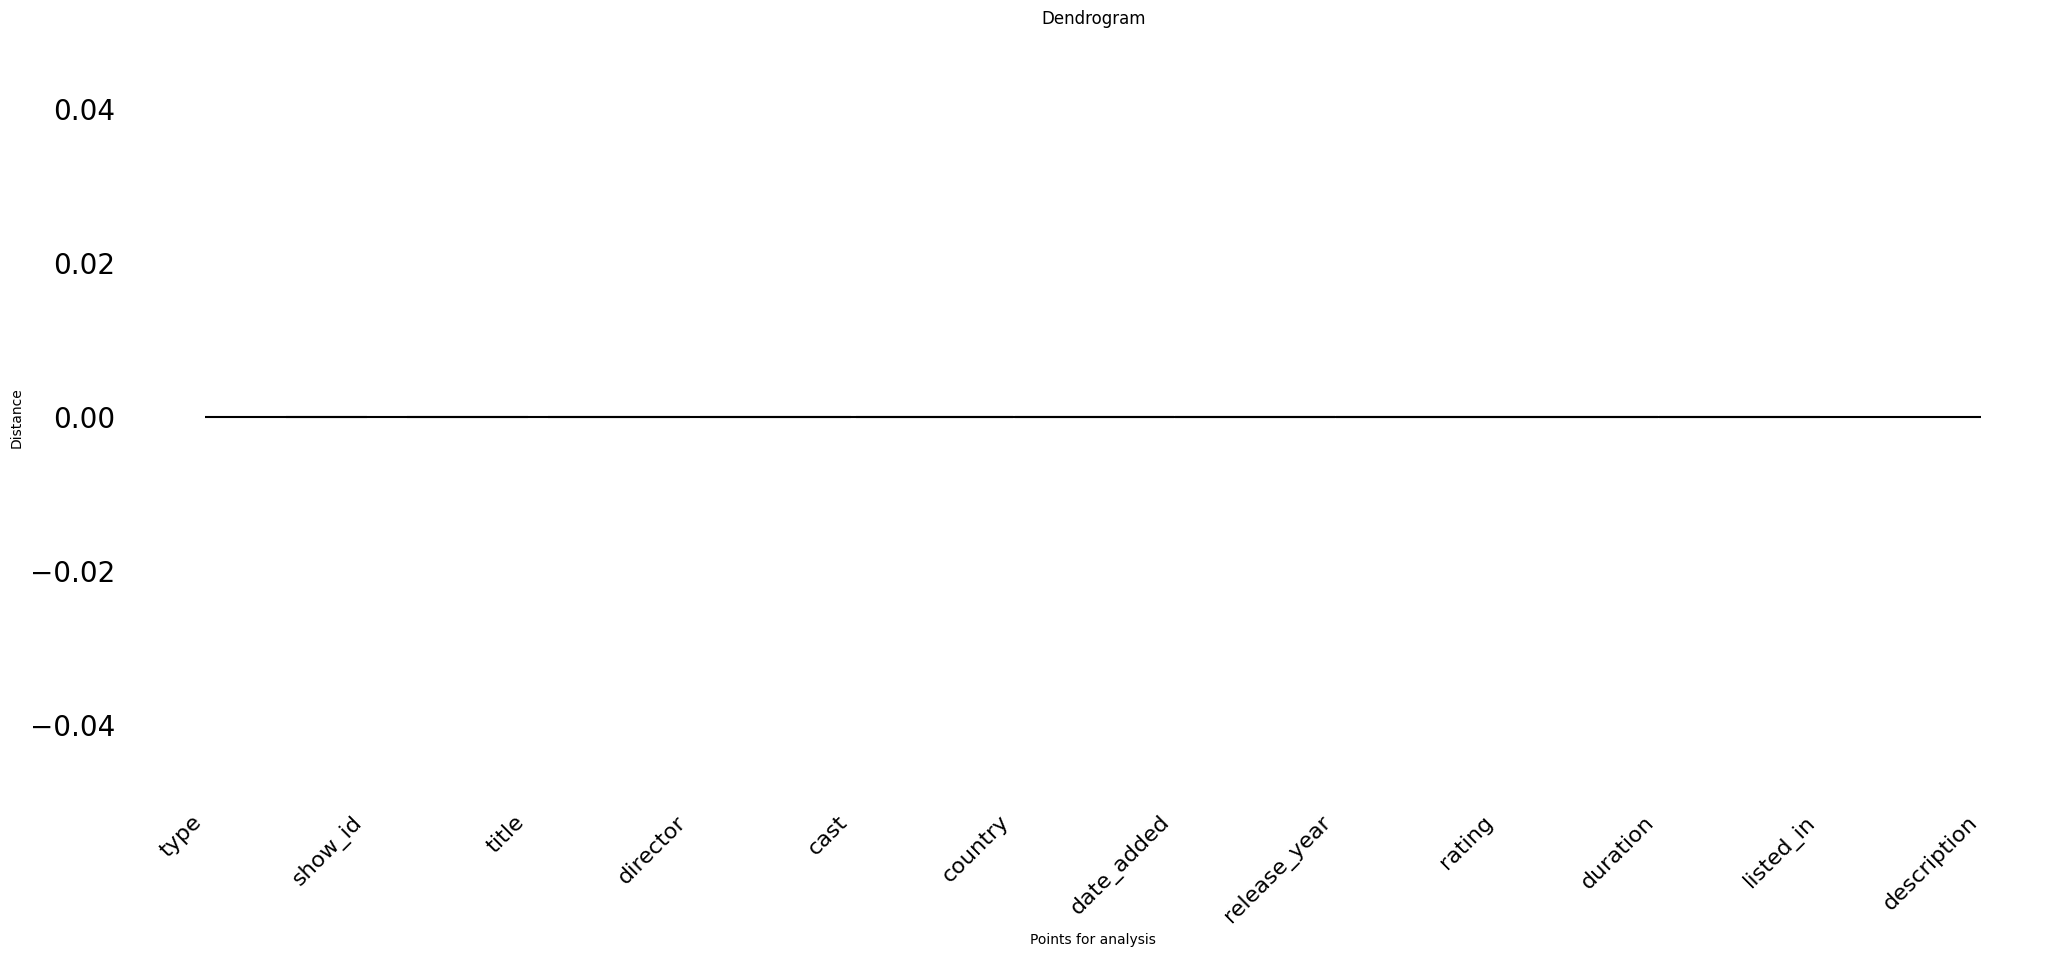

In [250]:
# Visualizing the missing values
import missingno as msno
msno.dendrogram(dataset,orientation='top')
plt.title('Dendrogram')
plt.xlabel('Points for analysis')
plt.ylabel('Distance')

**WE HANDELED MISSING VALUES SUCESSFULLY**

## ***2. Understanding Your Variables***

In [251]:
# Dataset Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Variables Description

**Attribute Information**

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description

### Check Unique Values for each variable.

In [252]:
# Check Unique Values for each variable.
dataset.nunique().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of show_id         7787
type               2
title           7787
director        4050
cast            6832
country          682
date_added      1566
release_year      73
rating            15
duration         216
listed_in        492
description     7769
dtype: int64>

## 3. ***Data Wrangling***

##  **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**CHART 1**

## **Top 10 Movie Show Actors and Top 10 TV Show Actors**

In [253]:
# Extracting individual cast members' names from the 'cast' column for TV shows and storing them in the variable 'tv_cast'
tv_cast=dataset[dataset['type']=='TV Show']['cast'].str.split(', ',expand=True).stack()
tv_cast

0     0         João Miguel
      1    Bianca Comparato
      2        Michel Gomes
      3     Rodolfo Valente
      4     Vaneza Oliveira
                 ...       
7779  1      Ana Julia Yeyé
      2       Ray Contreras
      3         Pablo Morán
7785  0       Adriano Zumbo
      1         Rachel Khoo
Length: 17935, dtype: object

In [254]:
# Extracting individual cast members' names from the 'cast' column for movies and storing them in the variable 'mv_cast'
mv_cast=dataset[dataset['type']=='Movie']['cast'].str.split(', ',expand=True).stack()
mv_cast

1     0            Demián Bichir
      1           Héctor Bonilla
      2            Oscar Serrano
      3             Azalia Ortiz
      4           Octavio Michel
                   ...          
7783  5            Malkeet Rauni
      6           Anita Shabdish
      7    Chittaranjan Tripathy
7784  0                  Nasty C
7786  0                         
Length: 38738, dtype: object

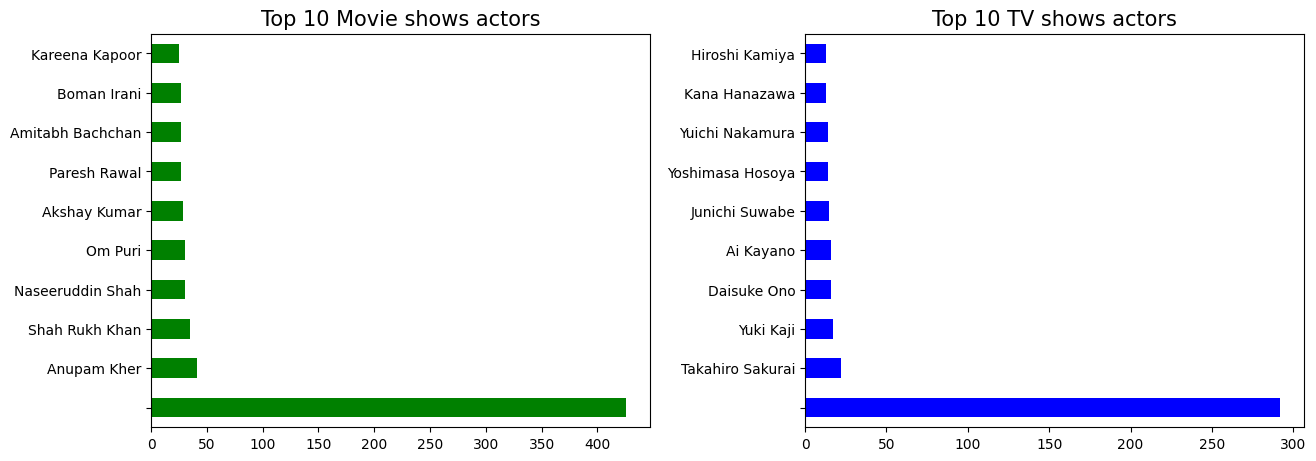

In [255]:
## Plotting the top 10 actors in movies and TV shows in horizontal bar charts, and displaying them side by side
fig,ax = plt.subplots(1,2, figsize=(14,5))

a = mv_cast.value_counts().head(10).plot(kind='barh', ax=ax[0],color='green')
a.set_title('Top 10 Movie shows actors', size=15)
b = tv_cast.value_counts().head(10).plot(kind='barh', ax=ax[1],color='blue')
b.set_title('Top 10 TV shows actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

According to the given graph, Anupam kher ,sharukh khan emerges as the leading actor in the top 10 movie shows, closely followed by Amitabh Bachchan. Similarly, in the TV shows, Takahiro Sakurai stands out as one of the top 10 actors.

**CHART 2**
## **Top 10 Movie Show Director and Top 10 TV Show Directors**

In [256]:
#Extracting the top 10 most frequent TV show directors from the dataset
tv_dir=dataset[dataset['type']=='TV Show']['director']
tv_dir.value_counts().nlargest(10)

                              2226
Alastair Fothergill              3
Shin Won-ho                      2
Iginio Straffi                   2
Rob Seidenglanz                  2
Stan Lathan                      2
Ken Burns                        2
Cosima Spender                   1
Jani Lachauer, Jakob Schuh       1
Jalil Lespert                    1
Name: director, dtype: int64

In [257]:
#Extracting the top 10 most frequent movie directors from the dataset
mv_dir=dataset[dataset['type']=='Movie']['director']
mv_dir.value_counts().nlargest(10)

                          163
Raúl Campos, Jan Suter     18
Marcus Raboy               15
Jay Karas                  14
Cathy Garcia-Molina        13
Jay Chapman                12
Martin Scorsese            12
Youssef Chahine            12
Steven Spielberg           10
David Dhawan                9
Name: director, dtype: int64

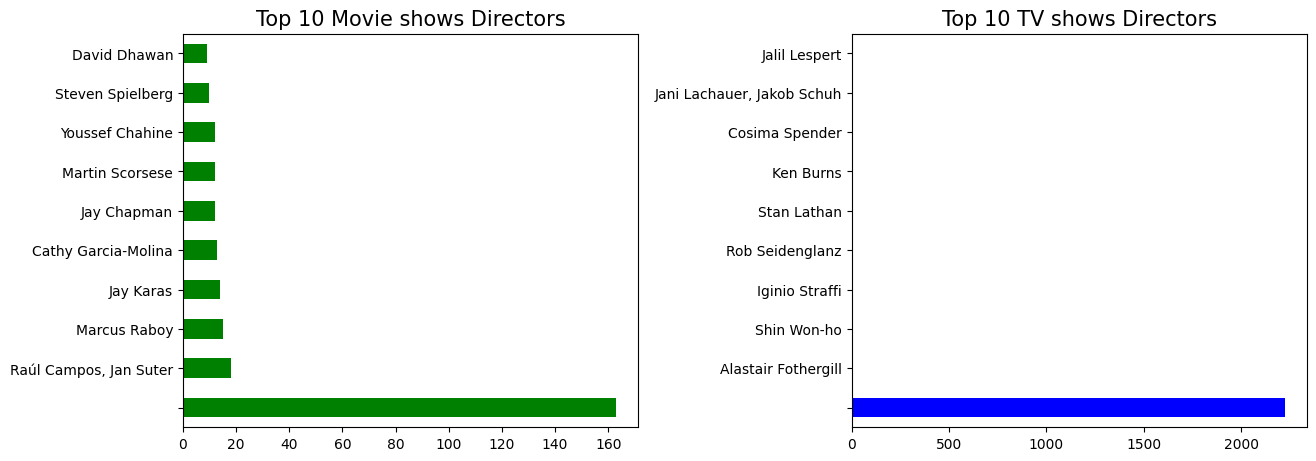

In [258]:
## Plotting the top 10 Directors in movies and TV shows in horizontal bar charts, and displaying them side by side
fig,ax = plt.subplots(1,2, figsize=(14,5))

a = mv_dir.value_counts().head(10).plot(kind='barh', ax=ax[0],color='green')
a.set_title('Top 10 Movie shows Directors', size=15)
b = tv_dir.value_counts().head(10).plot(kind='barh', ax=ax[1],color='blue')
b.set_title('Top 10 TV shows Directors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

According to the provided graph, raul Campos  and Jan Suter are prominent figures among the top 10 movie show directors. Similarly, the TV Show graph indicates that Jalil Lespert, Port Johnny Launcher, Jacob  and rest of the seems to have equal count among the top 10 TV show directors.

**CHART 3**

## **Checking the distribution of MOVIE SHOW & TV SHOWS**


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1 Season'),
  Text(1, 0, '2 Seasons'),
  Text(2, 0, '3 Seasons'),
  Text(3, 0, '4 Seasons'),
  Text(4, 0, '5 Seasons'),
  Text(5, 0, '6 Seasons'),
  Text(6, 0, '7 Seasons'),
  Text(7, 0, '8 Seasons'),
  Text(8, 0, '9 Seasons'),
  Text(9, 0, '10 Seasons')])

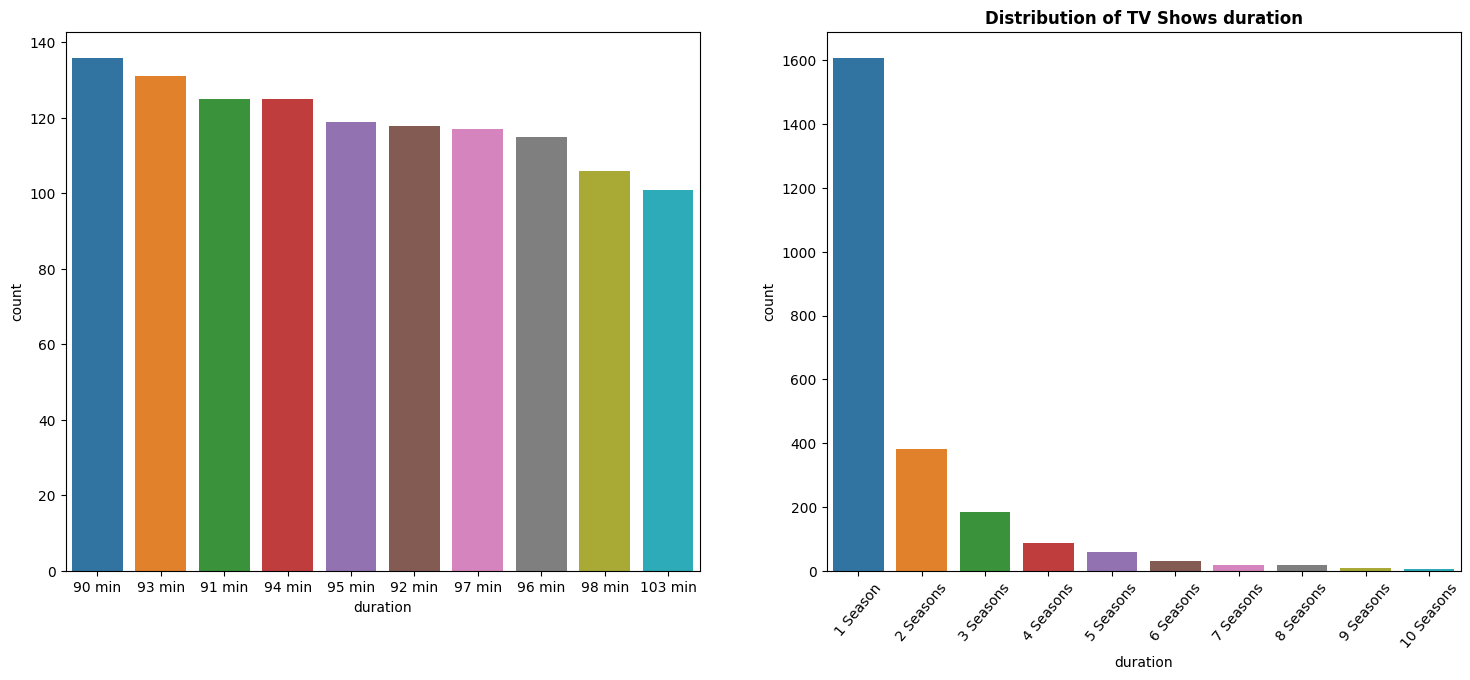

In [259]:
#Checking the distribution of TV SHOWS

fig, ax = plt.subplots(1,2,figsize=(18,7))
mv_dur=dataset[dataset['type']=='Movie']['duration']
tv_dur=dataset[dataset['type']=='TV Show']['duration']
plt.title("Distribution of TV Shows duration",fontweight='bold')

sns.countplot(x=mv_dur,data=mv_dur,order = mv_dur.value_counts().head(10).index,ax=ax[0])
plt.xticks(rotation=50)

sns.countplot(x=tv_dur,data=tv_dur,order = tv_dur.value_counts().head(10).index,ax=ax[1])
plt.xticks(rotation=50)

By examining the graph, we can observe the distribution of durations for both movie shows and TV shows. In the case of movies, the most common duration is found to be 90 minutes. On the other hand, for TV shows, it is noticed that the majority of them have a duration described as "one season," with the first season being the most prevalent.

**CHART 4**

## **Based on the Type of Conent watched on Netflix**

<Axes: xlabel='type', ylabel='count'>

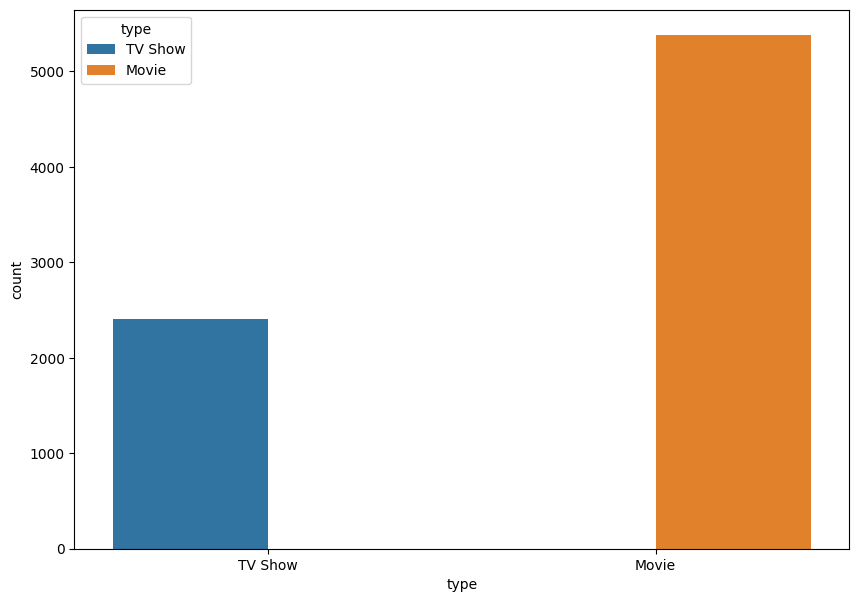

In [260]:
# Based on type Visualization

fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(dataset,x=dataset['type'],hue=dataset['type'])


Based on the graph, "The Movie shows" appears to have the highest count  while TV shows available on Netflix have a relatively lower count compared to movie shows.

**CHART 5**

## **Top 10 Movie Genres Analysis**






In [261]:
#visualization code
import plotly.express as px

top_10_Genre = dataset['listed_in'].value_counts().head(10)

fig2 = px.pie(top_10_Genre, values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig2.update_layout(height=600, width=900, title='Top 10 genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=12, color='#FF0000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig2.show()

Upon analyzing the top 10 movies , it becomes evident that documentaries hold the top position among the categories, followed by stand-up comedy, dramas, and international movies. Comedies and dramas come next in the order of popularity. These findings indicate a greater interest among people in watching documentaries.

**CHART 5**

## **Top 15 Countries with Most Content- Analysis**



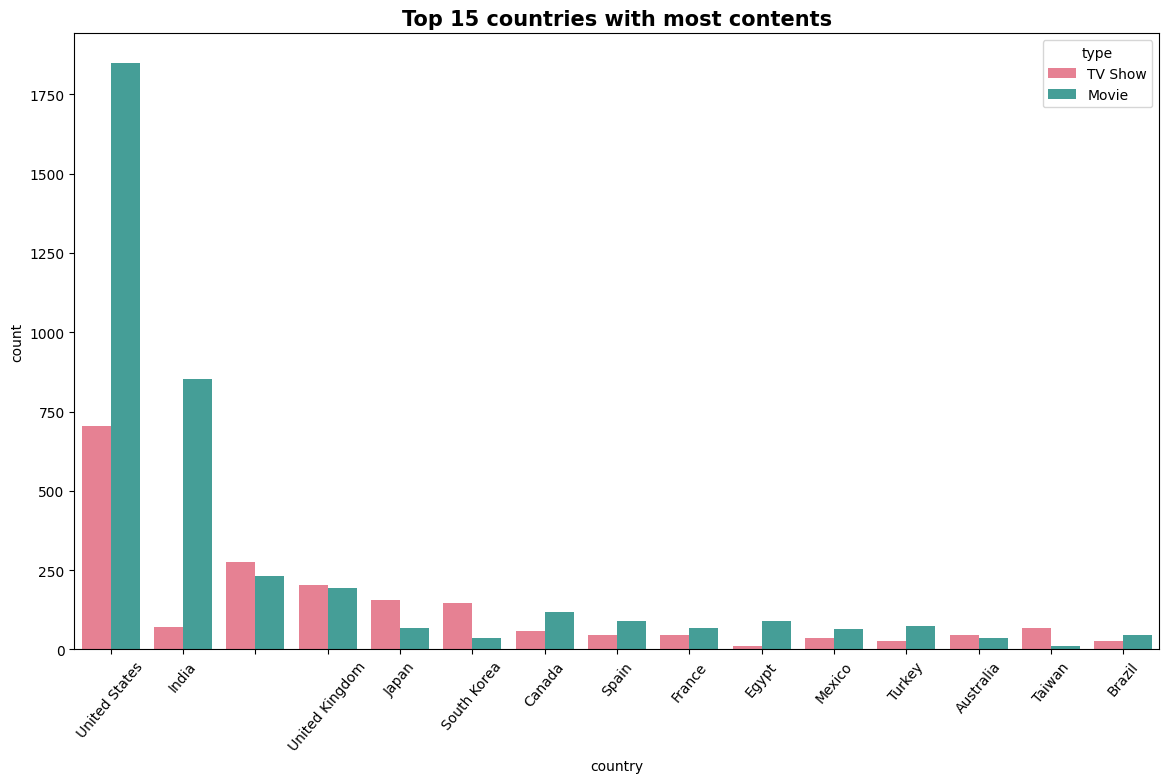

In [262]:
#Analysing top15 countries with most content
plt.figure(figsize=(14,8))
sns.countplot(x=dataset['country'],palette="husl",order=dataset['country'].value_counts().index[0:15],hue=dataset['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

The graph reveals the top 15 countries with the highest content production in movies and TV shows. It is evident that the United States leads the list as the country with the most movie content, while India takes the lead for TV show content, having the highest number of productions.

**CHART 6**
## **visualize the distribution of ratings for different types of content (movies and TV shows)**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'TV-PG'),
  Text(3, 0, 'R'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'PG'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'NR')])

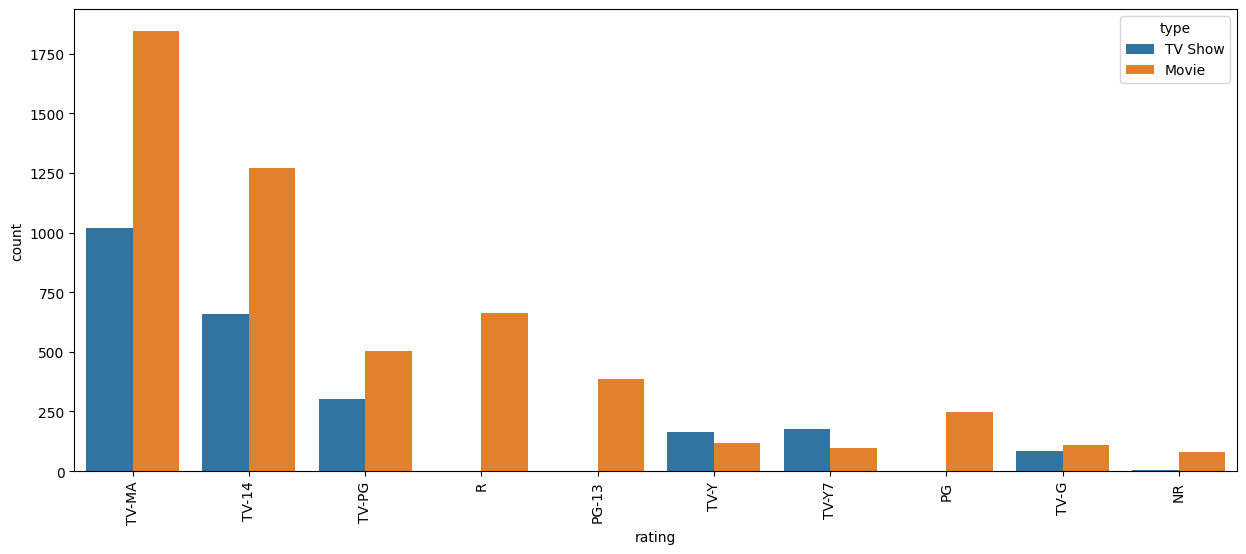

In [46]:
# Creating a countplot to visualize the distribution of ratings for movies and TV shows in the dataset, with the top 10 most frequent ratings displayed
fig,ax = plt.subplots( figsize=(15,6))
sns.countplot(x="rating", data=dataset, hue='type', order=dataset['rating'].value_counts().index[0:10])
plt.xticks(rotation=90)


The observation that TV-MA is the predominant rating for both movies and TV shows provides valuable insights for content strategies, audience targeting, programming decisions, and content diversity. This information can guide decision-making processes to enhance the Netflix experience, attract a broader range of viewers, and improve customer satisfaction. By recognizing the popularity of TV-MA content, Netflix can curate and produce content that aligns with the preferences and expectations of its audience, ultimately leading to increased viewership and positive business outcomes.

**CHART -7**

## **Distribution by released year**


In [47]:
#CHECKING UNIQUE VALUES IN RELEASE_YEAR COLUMN
dataset['release_year'].nunique()

73

In [49]:
#printing the same
print(f'Oldest release year : {dataset.release_year.min()}')
print(f'Latest release year : {dataset.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


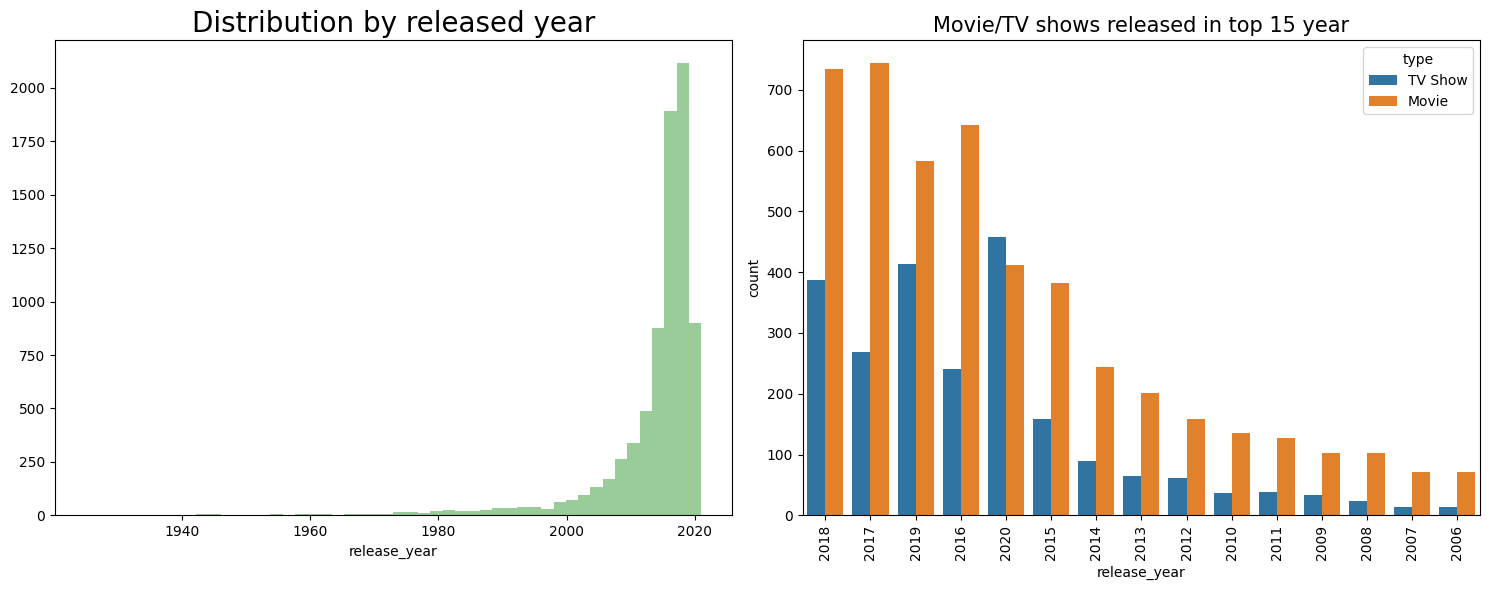

In [50]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.distplot(dataset['release_year'], ax=ax[0], kde=False,color='green')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=dataset, order=dataset['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


The histogram depicting the distribution of release years shows a consistent pattern of movies being added to Netflix starting from approximately 1980. The number of releases gradually increases over time, with a notable surge in releases from the year 2000 onwards. The peak of the distribution occurs between 2010 and 2020, indicating a substantial volume of movie and TV show releases during that period.

When considering the content types, the bar graph reveals that the years 2017 and 2020 stand out with the highest activity. These years exhibit a significant number of movie releases, TV show releases, and a combination of both on the Netflix platform.

**CHART -8**

## **CORRELATION HEAT MAP**

In [51]:
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
dataset['target_ages'] = dataset['rating'].replace(ratings)


In [52]:
# Preparing data for heatmap
dataset['count'] = 1
data = dataset.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = dataset.loc[dataset['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country                  Canada     Egypt    France     India     Japan  \
target_ages                                                               
             0.001972  0.000000  0.000000  0.000000  0.000000  0.004425   
Adults       0.317554  0.446328  0.277228  0.678261  0.255688  0.362832   
Kids         0.171598  0.180791  0.000000  0.095652  0.016251  0.008850   
Older Kids   0.234714  0.225989  0.039604  0.060870  0.160347  0.269912   
Teens        0.274162  0.146893  0.683168  0.165217  0.567714  0.353982   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
                0.000000  0.000000        0.000000       0.001174  
Adults          0.469945  0.835821        0.513854       0.501370  
Kids            0.027322  0.022388        0.093199       0.073190  
Older Kids      0.120219  0.044776        0.204030       0.187476  
Teens           0.382514  0.097015        0.188917       0.236791

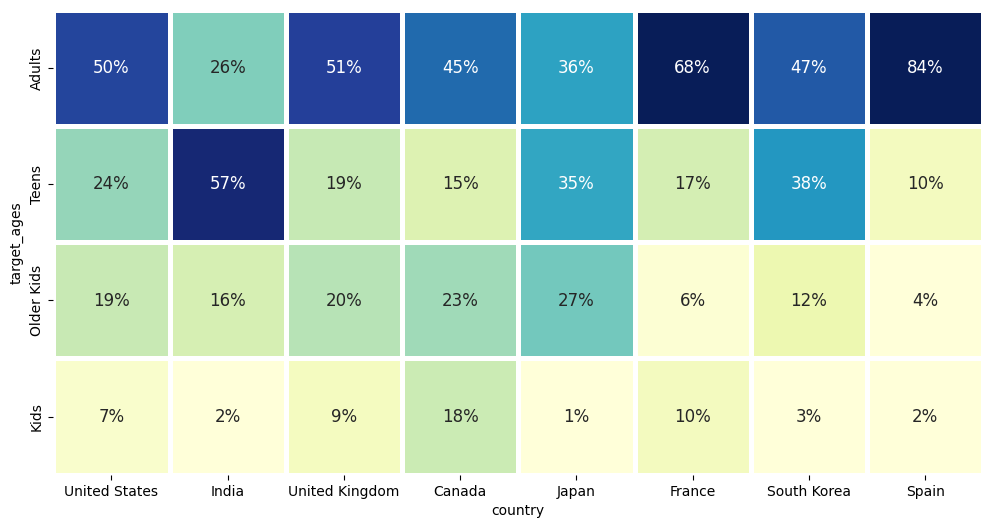

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

In summary, the data reveals variations in interest levels regarding the subject across different countries and target age groups. The key conclusions are as follows:

Spain: The highest percentage of adults (84%) shows interest in the subject, indicating strong engagement among this demographic.

France: With 68% of adults expressing interest, there is significant engagement in the subject among the adult population.

India: The highest percentage of interest (57%) is observed among teenagers, indicating a notable interest in the subject among the younger population.

United Kingdom: Adults in the United Kingdom also exhibit a relatively high level of interest, with 51% expressing interest.

South Korea and United States: Both countries have 47% of adults showing interest, indicating a moderate level of engagement.

Japan: It demonstrates a moderate level of interest among both adults and teens, with 36% of each group expressing interest.

Canada: Among the listed countries, Canada has the lowest percentage of interest, with 45% of adults showing interest.

Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. Spain, France, India, and Mexico stand out with higher levels of interest among adults, while Canada exhibits relatively lower interest compared to the other countries.

**CHART-9**

## **TOP 10 Countries by number of Movies**

In [55]:
#Counting the frequency of each country in the 'country' column and sorting the values in descending order
country_count=dataset['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries


country
United States      2555
India               923
                    507
United Kingdom      397
Japan               226
South Korea         183
Canada              177
Spain               134
France              115
Egypt               101
Mexico              100

In [56]:
#visualization using funnel chart
data3 = dict(
    number=[3062, 923, 397, 226, 183, 177, 134, 115, 101, 100],
    country=["United States", "India", "United Kingdom", "Canada", "Spain", 'Turkey', 'Philippines', 'France',
             'South Korea', 'Australia']
)

fig = px.funnel(data3,
                x='number',
                y='country',
                title='Funnel Chart- Top 10 Countries by Number of Movies',
                labels={'number': 'Number of Movies', 'country': 'Country'},
                color_discrete_sequence=px.colors.qualitative.Plotly,
                height=1000,
                width=900,
                template='plotly_dark'
                )
fig.show()

The United States has the highest number of movies, with 3062 films, indicating a dominant presence in the film industry.India is the second-highest contributor with 923 movies, demonstrating a significant presence in the global Movies/Tv shows market.

# **4. making some hypothesis**


**1.HYPOTHESIS TESTING**
*   HO:movies rated for kids and older kids are at least two hours long.
*   H1:movies rated for kids and older kids are not at least two hours long.

In [263]:
dataset

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                        João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                                               Nasty C   
7785                                            Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                      

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                     September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

In [264]:
#making copy of df_clean_frame
df_hypothesis=dataset.copy()
#head of df_hypothesis
df_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [265]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [266]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', ' '], dtype=object)

In [267]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

          date_added  release_year rating  duration  \
1  December 23, 2016          2016  TV-MA        93   
2  December 20, 2018          2011      R        78   
3  November 16, 2017          2009  PG-13        80   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description target_ages  
1  After a devastating earthquake hits Mexico Cit...      Adults  
2  When an army recruit is found dead, his fellow...      Adults  
3  In a postapocalyptic world, rag-doll robots hi...       Teens

In [268]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.275145

In [269]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [270]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


The code performs calculations related to two-sample t-tests. It calculates the lengths of the groups, degrees of freedom, pooled variance, standard pooled deviation, and t-value. The results provide insights into the statistical significance of the difference between the means of groups A and B.

In [271]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9620900365868952

In [272]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

**2. HYPOTHESIS TESTING**
*    H1:The duration which is more than 90 mins are  movies
*   HO:The duration which is more than 90 mins are NOT movies



In [273]:
#making copy of df_clean_frame
df_hypothesis=dataset.copy()
#head of df_hypothesis
df_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [274]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [275]:

df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)


show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating  duration  \
0    August 14, 2020          2020  TV-MA         4   
1  December 23, 2016          2016  TV-MA        93   
2  December 20, 2018          2011      R        78   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...

In [276]:
#group_by duration and TYPE
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

type   duration
0    Movie  99.307978
1  TV Show   1.775934

In [277]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


In [278]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


The code performs calculations related to two-sample t-tests. It calculates the lengths of the groups, degrees of freedom, pooled variance, standard pooled deviation, and t-value. The results provide insights into the statistical significance of the difference between the means of groups A and B.

In [279]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9602687544602204

In [280]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

**Handling Outliers**

<Axes: >

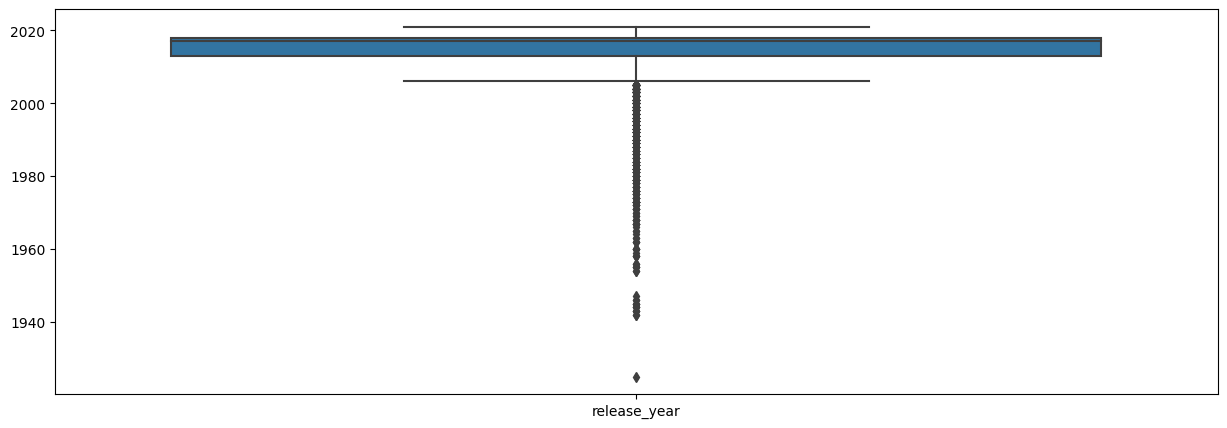

In [281]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=dataset)


In [282]:
#Calculating the interquartile range (IQR) for the release_year column in the dataset
IQR_Q1 = dataset.release_year.quantile(0.25)
IQR_Q3 = dataset.release_year.quantile(0.75)
IQR = IQR_Q3 - IQR_Q1

This code calculates the Interquartile Range (IQR) for the specified columns of a dataset. The IQR is a measure of statistical dispersion that measures the range between the first quartile (Q1) and the third quartile (Q3) of a dataset.

The code uses the numpy.percentile function to calculate the values of Q1 and Q3, where the second argument (25 and 75, respectively) specifies the percentile to be calculated. In other words, Q1 is the 25th percentile of the data and Q3 is the 75th percentile of the data.

The "dataset[outlier_cols]" selects the columns that are to be considered for outlier detection. This can be useful if there are specific columns that are suspected to contain outliers, rather than examining the entire dataset.

The resulting IQR value is then calculated by subtracting Q1 from Q3, and the final result is returned as the output of the code.

Overall, this code snippet provides a simple and efficient way to calculate the IQR for a specific subset of columns within a dataset, which can be useful in identifying potential outliers within those columns.

In [283]:
print(f'1st Quartile Range for Release Year',IQR_Q1)
print(f'2nd Quartile Range for Release Year',IQR_Q3)
print(f'Inter Quartile Range for Release Year',IQR)

1st Quartile Range for Release Year 2013.0
2nd Quartile Range for Release Year 2018.0
Inter Quartile Range for Release Year 5.0


In [284]:
#Identifying outliers in the release_year column based on the interquartile range (IQR) method
outliers = dataset[(dataset.release_year < (IQR_Q1 - 1.5 * IQR)) | ( dataset.release_year > (IQR_Q3 + 1.5 * IQR)) ]
outliers

show_id     type                 title         director  \
7         s8    Movie                   187   Kevin Reynolds   
44       s45    Movie              Æon Flux     Karyn Kusama   
94       s95    Movie               28 Days     Betty Thomas   
97       s98    Movie           3 Deewarein  Nagesh Kukunoor   
105     s106    Movie   300 Miles to Heaven   Maciej Dejczer   
...      ...      ...                   ...              ...   
7745   s7746    Movie  Yours, Mine and Ours     Raja Gosnell   
7749   s7750  TV Show             Yu-Gi-Oh!                    
7754   s7755    Movie                  Yuva      Mani Ratnam   
7760   s7761    Movie             Zaki Chan       Wael Ihsan   
7782   s7783    Movie                  Zozo      Josef Fares   

                                                   cast  \
7     Samuel L. Jackson, John Heard, Kelly Rowan, Cl...   
44    Charlize Theron, Marton Csokas, Jonny Lee Mill...   
94    Sandra Bullock, Viggo Mortensen, Dominic West,...   
97    Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...   
105   Krzysztof Stroiński, Andrzej Mellin, Adrianna ...   
...                                                 ...   
7745  Dennis Quaid, Rene Russo, Sean Faris, Katija P...   
7749  Dan Green, Eric Stuart, Amy Birnbaum, Darren D...   
7754  Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...   
7760  Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   

                                                country          date_added  \
7                                         United States    November 1, 2019   
44                                        United States    February 1, 2018   
94                                        United States  September 30, 2020   
97                                                        December 31, 2019   
105                             Denmark, France, Poland     October 1, 2019   
...                                                 ...                 ...   
7745                                      United States   November 20, 2019   
7749                                              Japan        July 8, 2020   
7754                                              India       March 1, 2018   
7760                                              Egypt        May 19, 2020   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   

      release_year rating   duration  \
7             1997      R    119 min   
44            2005  PG-13     93 min   
94            2000  PG-13    104 min   
97            2003  TV-MA    121 min   
105           1989  TV-14     93 min   
...            ...    ...        ...   
7745          2005     PG     88 min   
7749          2005  TV-Y7  2 Seasons   
7754          2004  TV-14    160 min   
7760          2005  TV-PG    109 min   
7782          2005  TV-MA     99 min   

                                            listed_in  \
7                                              Dramas   
44               Action & Adventure, Sci-Fi & Fantasy   
94                                   Comedies, Dramas   
97            Dramas, International Movies, Thrillers   
105                      Dramas, International Movies   
...                                               ...   
7745               Children & Family Movies, Comedies   
7749                           Anime Series, Kids' TV   
7754                     Dramas, International Movies   
7760  Comedies, International Movies, Romantic Movies   
7782                     Dramas, International Movies   

                                            description  
7     After one of his high school students attacks ...  
44    Aiming to hasten an uprising, the leader of an...  
94    After her drunken antics result in property da...  
97    A reporter interviews three convicts on death ...  
105   Hoping to help their dissident parents, two br...  
...                                                 ...  
7745  

In [285]:
#15 percentile value is 2009
dataset["release_year"] = np.where(dataset["release_year"] <2000, dataset.release_year.mean(),dataset['release_year'])

<Axes: >

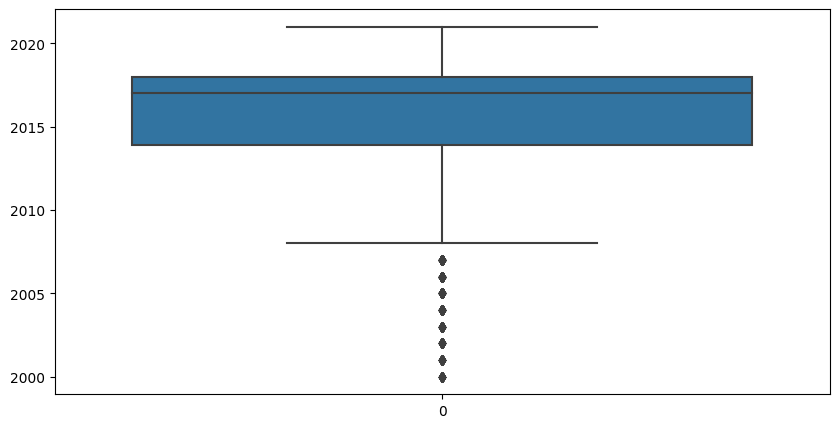

In [286]:
# plotting graph
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=dataset['release_year'])

# **5. Feature engineering**

In [206]:
# creating tags column using all text column which one is used for model building purpose.
dataset['text_columns'] = dataset['director'] + dataset['cast'] + dataset['country'] + dataset['rating'] + dataset['listed_in'] + dataset['description']
dataset['text_columns']

0        João Miguel, Bianca Comparato, Michel Gomes, ...
1       Jorge Michel GrauDemián Bichir, Héctor Bonilla...
2       Gilbert ChanTedd Chan, Stella Chung, Henley Hi...
3       Shane AckerElijah Wood, John C. Reilly, Jennif...
4       Robert LuketicJim Sturgess, Kevin Spacey, Kate...
                              ...                        
7782    Josef FaresImad Creidi, Antoinette Turk, Elias...
7783    Mozez SinghVicky Kaushal, Sarah-Jane Dias, Raa...
7784     Nasty C TV-MADocumentaries, International Mov...
7785     Adriano Zumbo, Rachel KhooAustraliaTV-PGInter...
7786    Sam Dunn United Kingdom, Canada, United States...
Name: text_columns, Length: 7787, dtype: object

**Removing Stop Words**

In [207]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
dataset['description']=dataset['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
dataset['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'In future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

The code downloads stopwords from the nltk library, defines a stopwords removal function, applies the function to the 'description' column in the 'dataset' DataFrame, and showcases the result by displaying the processed text of the first row in the 'description' column. This process effectively removes stopwords from the text data.

**Removing Punctuations**

In [208]:
# function to remove punctuations
def punctuation(txt):
    punc = str.maketrans('', '', string.punctuation)
    return txt.translate(punc)

In [209]:
#remove punctuation
dataset['text_columns'].apply(punctuation)

0        João Miguel Bianca Comparato Michel Gomes Rod...
1       Jorge Michel GrauDemián Bichir Héctor Bonilla ...
2       Gilbert ChanTedd Chan Stella Chung Henley Hii ...
3       Shane AckerElijah Wood John C Reilly Jennifer ...
4       Robert LuketicJim Sturgess Kevin Spacey Kate B...
                              ...                        
7782    Josef FaresImad Creidi Antoinette Turk Elias G...
7783    Mozez SinghVicky Kaushal SarahJane Dias Raagha...
7784     Nasty C TVMADocumentaries International Movie...
7785     Adriano Zumbo Rachel KhooAustraliaTVPGInterna...
7786    Sam Dunn United Kingdom Canada United StatesTV...
Name: text_columns, Length: 7787, dtype: object

**STEMMING**


---
>


Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

In [210]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):
    '''a function which stems each word in the given text'''
    txt = [stemmer.stem(word) for word in text.split()]
    return " ".join(txt)

In [211]:
#applying stemming function
dataset['text_columns'].apply(stemming)

0       joão miguel, bianca comparato, michel gomes, r...
1       jorg michel graudemián bichir, héctor bonilla,...
2       gilbert chantedd chan, stella chung, henley hi...
3       shane ackerelijah wood, john c. reilly, jennif...
4       robert luketicjim sturgess, kevin spacey, kate...
                              ...                        
7782    josef faresimad creidi, antoinett turk, elia g...
7783    mozez singhvicki kaushal, sarah-jan dias, raag...
7784    nasti c tv-madocumentaries, intern movies, mus...
7785    adriano zumbo, rachel khooaustraliatv-pgintern...
7786    sam dunn unit kingdom, canada, unit statestv-m...
Name: text_columns, Length: 7787, dtype: object

In [212]:
#Tokenizing the text_columns in the dataset using the TweetTokenizer
tokenizer = TweetTokenizer()
dataset['text_columns'] = dataset['text_columns'].apply(lambda x: tokenizer.tokenize(x))
dataset['text_columns']

0       [João, Miguel, ,, Bianca, Comparato, ,, Michel...
1       [Jorge, Michel, GrauDemián, Bichir, ,, Héctor,...
2       [Gilbert, ChanTedd, Chan, ,, Stella, Chung, ,,...
3       [Shane, AckerElijah, Wood, ,, John, C, ., Reil...
4       [Robert, LuketicJim, Sturgess, ,, Kevin, Space...
                              ...                        
7782    [Josef, FaresImad, Creidi, ,, Antoinette, Turk...
7783    [Mozez, SinghVicky, Kaushal, ,, Sarah-Jane, Di...
7784    [Nasty, C, TV-MADocumentaries, ,, Internationa...
7785    [Adriano, Zumbo, ,, Rachel, KhooAustraliaTV-PG...
7786    [Sam, Dunn, United, Kingdom, ,, Canada, ,, Uni...
Name: text_columns, Length: 7787, dtype: object

The code tokenizes the text in the 'text_columns' column of the 'dataset' DataFrame using the TweetTokenizer class. It applies tokenization to each row of the column, updates the column with the tokenized text, and displays the updated 'text_columns' column. This process converts the text into a list of tokens, which can be further processed or analyzed.

**TEXT VECTORIZATION**

---



>


Text Vectorization is the process of converting text into numerical representation.

In [213]:
#Extracting the text columns from the dataset for data clustering#V
data_cluster=dataset['text_columns']

In [214]:
# Tokenization
def identity_tokenizer(txt):
    return txt

# create the object of tfid vectorizer
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer,stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(data_cluster)

# collect the vocabulary items used in the vectorizer
dic= tfidf.vocabulary_.items()
# convert vector into array form for clustering
dic = tfidf.transform(data_cluster).toarray()


print(dic)
print(f'shape of the vector :', {dic.shape})
print(f'datatype : {type(dic)}')


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.21033386 ... 0.22246866 0.21832866 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
shape of the vector : {(7787, 10000)}
datatype : <class 'numpy.ndarray'>


The code tokenizes the text data using an identity_tokenizer function and then applies Tfidf Vectorizer to vectorize the text. It fits the vectorizer on the data and transforms the text into an array representation. The resulting array, along with its shape and datatype, is printed to provide an overview of the vectorized data.

###  **Dimensionality reduction using PCA:**

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

In [98]:
# using PCA to reduce dimensionality
pca = PCA(random_state=50)
pca.fit(dic)

PCA(random_state=50)

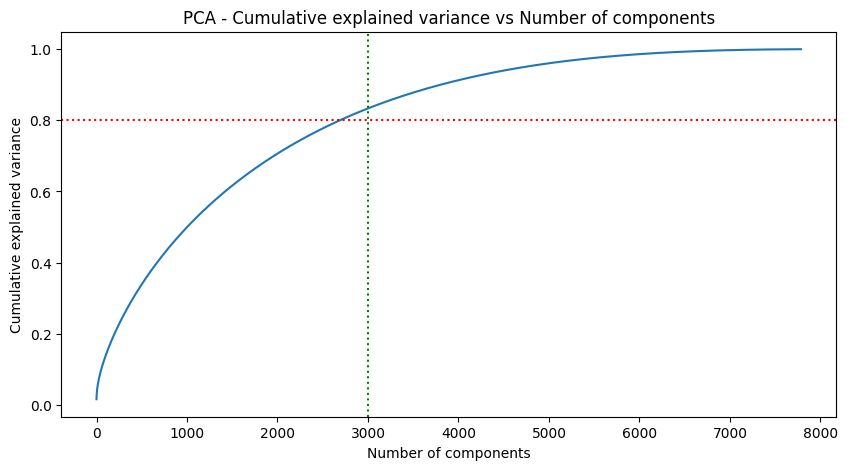

In [99]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle=':')
plt.axvline(x= 3000, color='green', linestyle=':')
plt.show()

Here it  generates a line plot that visualizes the cumulative explained variance ratio as the number of components increases in PCA (Principal Component Analysis). The plot helps to understand how many principal components are required to explain a certain percentage of the total variance in the data. The red horizontal line represents the threshold of 80% explained variance, and the green vertical line indicates the number of components at which the threshold is reached. This plot provides insights into the trade-off between the number of components and the amount of variance explained in the data.

**Observations:**
*   **We find that around 7500 components account for 100% of the variance**
*   **Also, just 4000 components comprise more than 80% of the variation**
*   **As a result, we can pull the top 4000 components out of the model to make it simpler and less dimensional while still being able to account for more than 80% of variance.**

In [100]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(dic)

PCA(n_components=3000, random_state=42)

In [101]:
# transformed features
trans_pca = pca.transform(dic)


## ***6. ML Model Implementation***

### K-Means

Text(0, 0.5, 'Sum of squared errors')

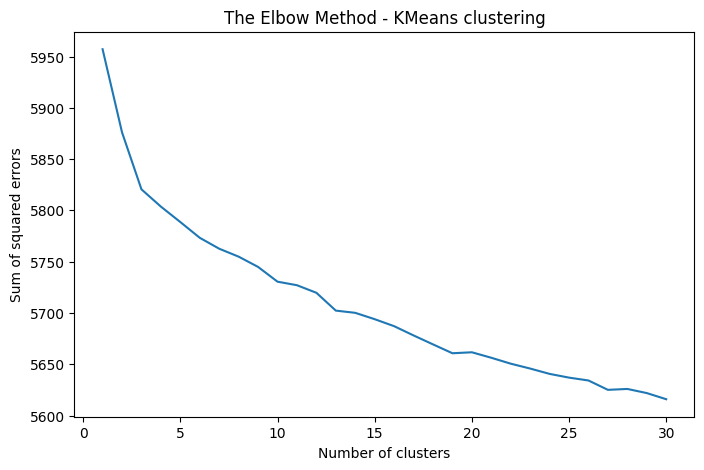

In [102]:
# Elbow method to find the optimal value of k
# Initialize a list to store the sum of squared errors for each value of K

emkm=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(trans_pca)
  emkm_itr = kmeans.inertia_
  emkm.append(emkm_itr)
clusters = range(1,31)
plt.figure(figsize=(8,5))
plt.plot(clusters,emkm)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')

It performs KMeans clustering with different values of K and calculates the sum of squared errors (SSE) for each value of K. It then plots the SSE against the number of clusters using the Elbow Method. The Elbow Method helps to identify the optimal number of clusters by looking for a point of inflection (elbow) in the plot where the SSE decreases at a slower rate. This point indicates the number of clusters that provides a good balance between minimizing SSE and avoiding excessive complexity.
* The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

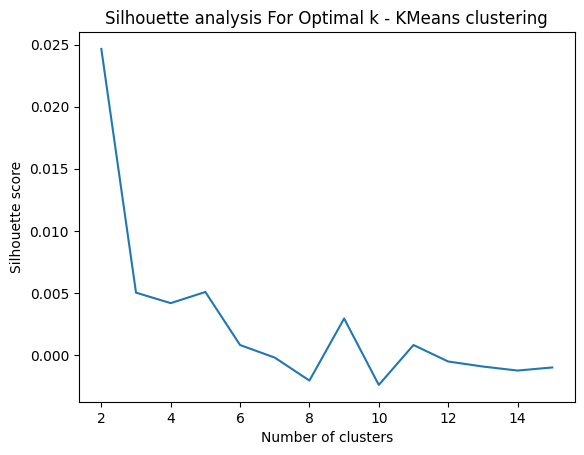

In [103]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(dic)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(dic, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* The highest Silhouette score is obtained for 6 clusters.
* Building 6 clusters using the k-means clustering algorithm.

It performs KMeans clustering with different values of K and computes the silhouette score for each value of K. The silhouette score measures how well each data point fits into its assigned cluster, indicating the cohesion and separation between clusters. The code plots the silhouette score against the number of clusters, helping to identify the optimal number of clusters based on the highest silhouette score. The higher the silhouette score, the better the clustering solution. The plot provides insights into the quality of the clustering solution for different values of K, aiding in the determination of the optimal number of clusters.

In [107]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=33)
kmeans.fit(dic)

KMeans(n_clusters=6, random_state=33)

In [108]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_scr = silhouette_score(dic, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_scr))

(6998.891138899515, 0.00039582277080244546)


In [109]:
# Adding a kmeans cluster number attribute
dataset['kmeans_cluster'] = kmeans.labels_

Text(0.5, 1.0, 'NUMBER OF MOVIES AND TV SHOWS IN EACH CLUSTER - KMEANS CLUSTERING')

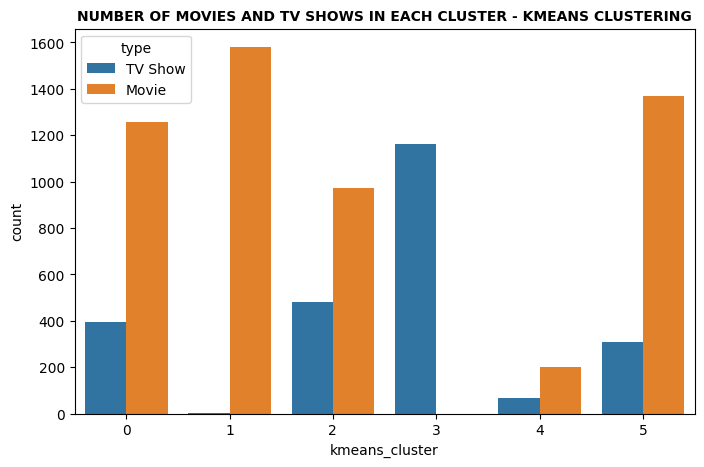

In [110]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
sns.countplot(x='kmeans_cluster',data=dataset, hue='type')
plt.title('NUMBER OF MOVIES AND TV SHOWS IN EACH CLUSTER - KMEANS CLUSTERING',fontsize=10, fontweight='bold')

#### **Building wordclouds for each clusters in K-Means Clustering**

In [111]:
def kmeans_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  ds_wordcloud = dataset[['kmeans_cluster',column_name]].dropna()
  ds_wordcloud = ds_wordcloud[ds_wordcloud['kmeans_cluster']==cluster_number]

  # text documents
  txt = " ".join(word for word in ds_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(txt)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

The code defines a function that generates a word cloud for movies/shows belonging to a specific cluster. It selects the relevant data, processes the text, and creates a word cloud visualization. The word cloud provides a visual representation of the most frequent words in the specified column, offering insights into the characteristics or themes associated with the movies/shows in that cluster.

cluster 0


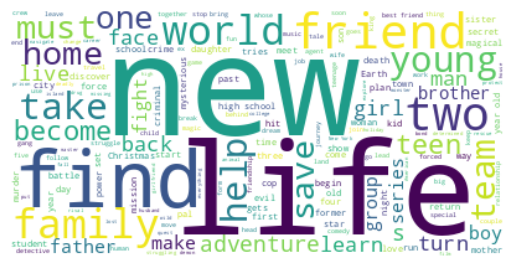

cluster 1


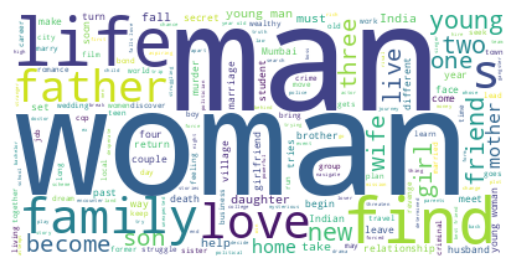

cluster 2


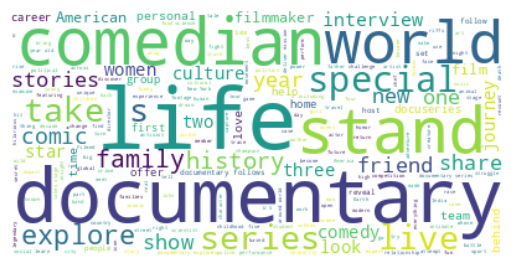

cluster 3


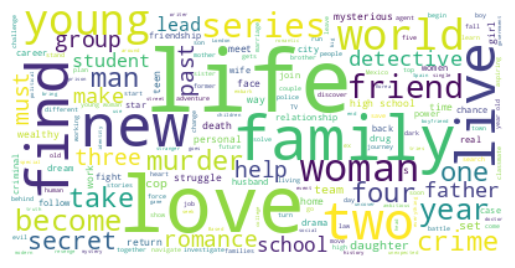

cluster 4


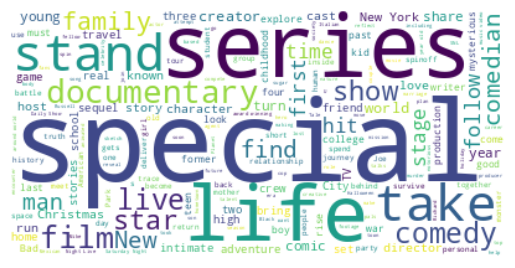

cluster 5


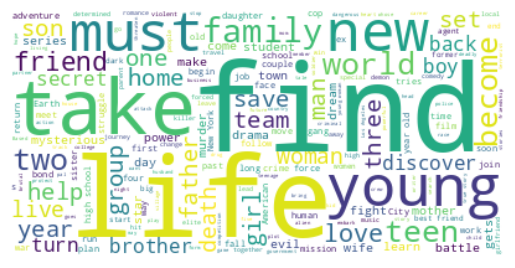

In [112]:
#Generating Word Clouds for Each Cluster's Description
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

cluster 0


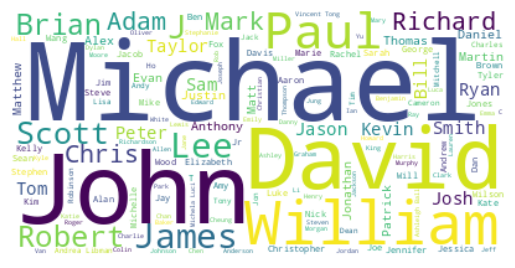

cluster 1


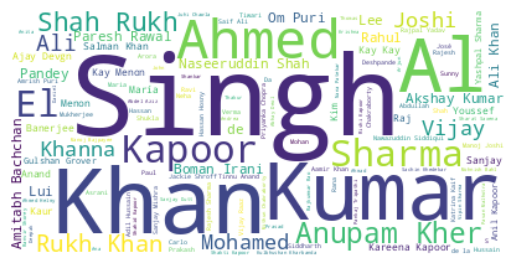

cluster 2


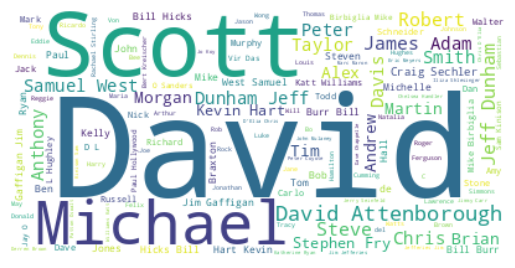

cluster 3


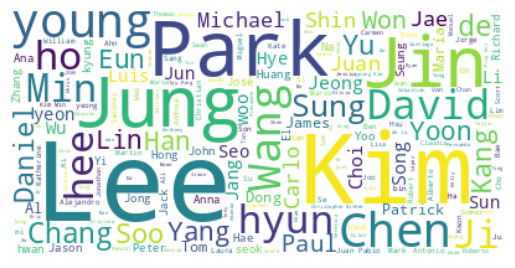

cluster 4


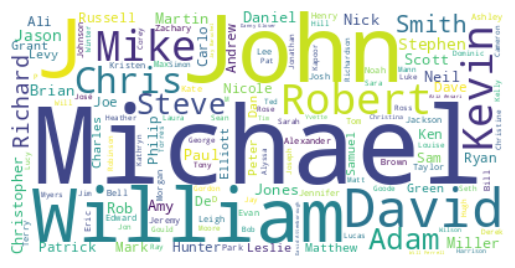

cluster 5


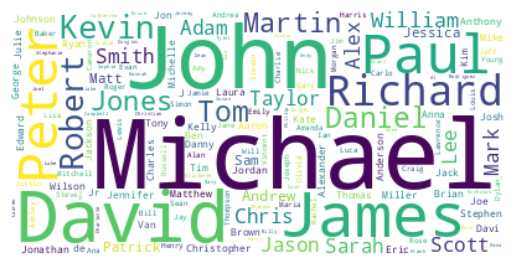

In [113]:
#Generating Word Clouds for Each Cluster's Cast
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

cluster 0


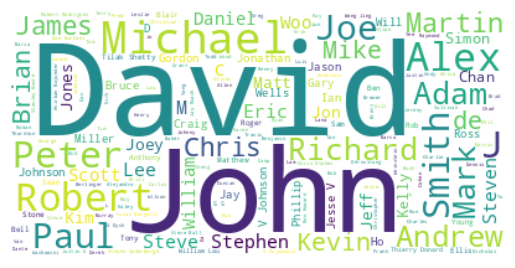

cluster 1


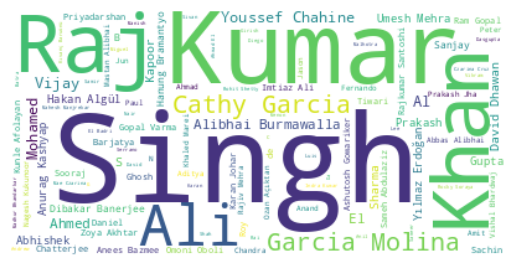

cluster 2


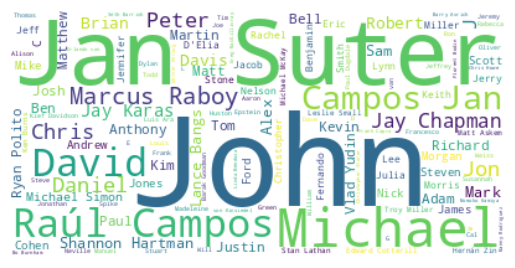

cluster 3


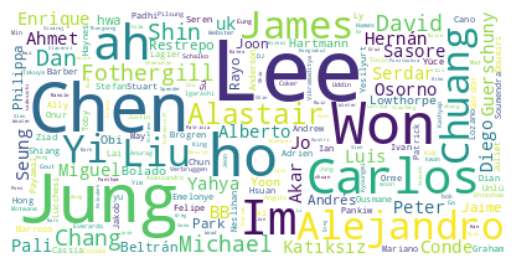

cluster 4


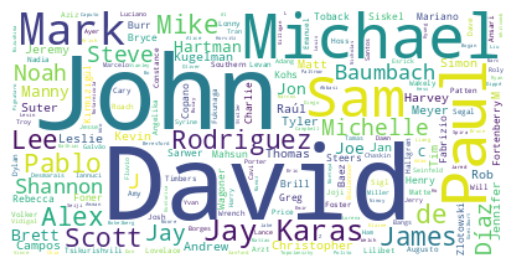

cluster 5


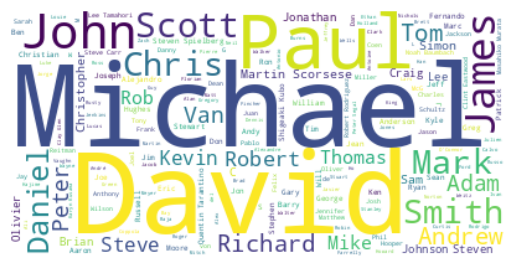

In [114]:
#Generating Word Clouds for Each Cluster's director
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'director')

cluster 0


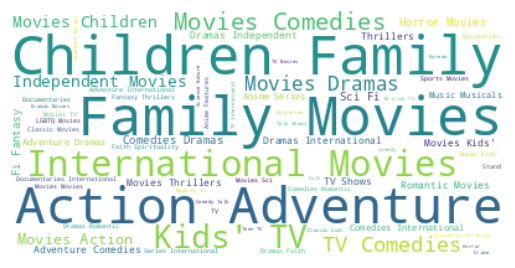

cluster 1


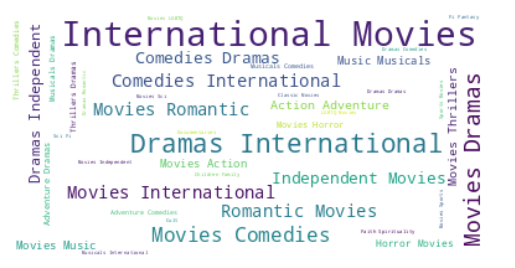

cluster 2


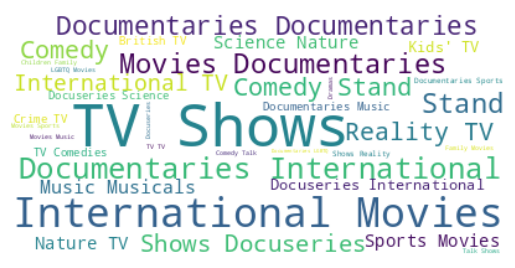

cluster 3


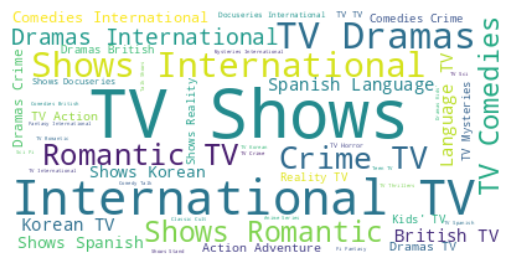

cluster 4


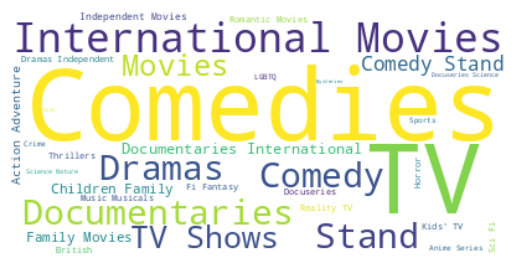

cluster 5


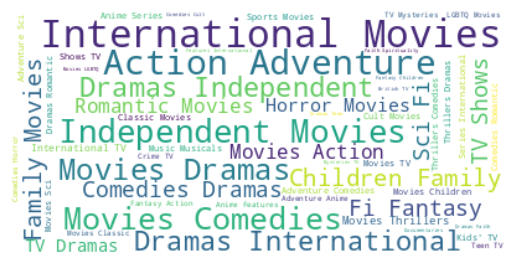

In [115]:
#Generating Word Clouds for Each Cluster's listed_in
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

cluster 0


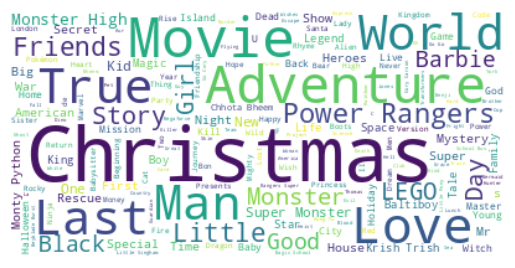

cluster 1


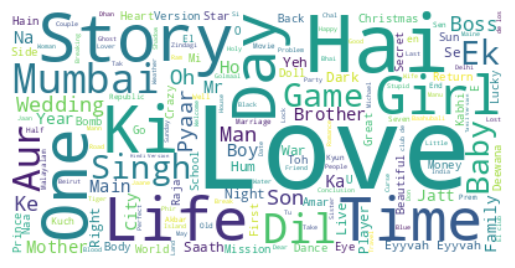

cluster 2


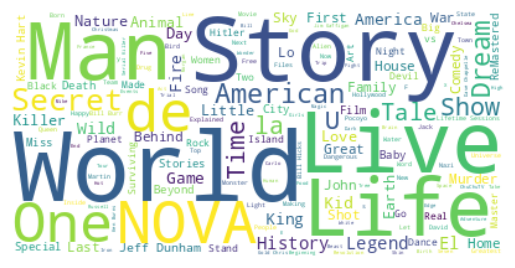

cluster 3


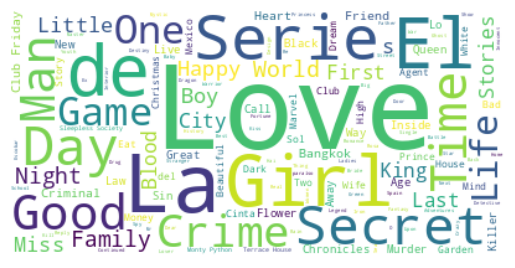

cluster 4


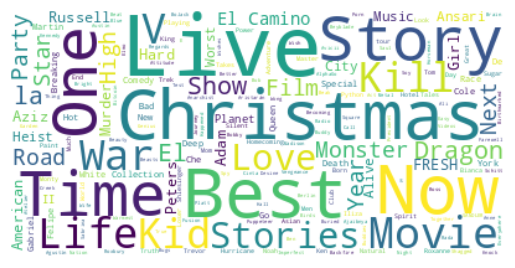

cluster 5


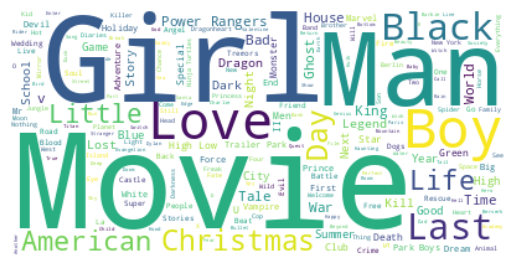

In [116]:
#Generating Word Clouds for Each Cluster's title
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

###**8.3. Hierarchical clustering**

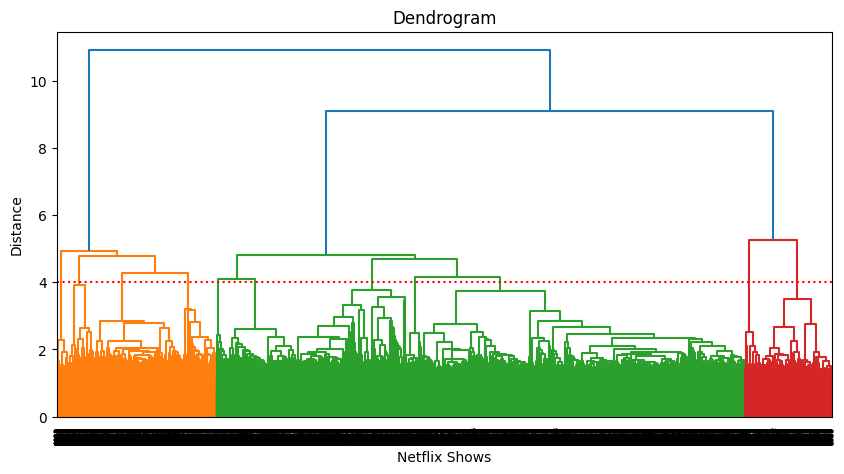

In [117]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(dic, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle=':')

**Agglomerative hierarchical clustering:Uses Bottom Up Approach.Suppose there are 4 data points. We will assign clusters to each data points and  hence will have 4 clusters in the beginning.Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left.**


In [118]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(dic)

array([1, 0, 1, ..., 2, 6, 2])

In [119]:
# Adding a hierarchical cluster number attribute
dataset['hierarchical_cluster'] = hierarchical.labels_

In [120]:
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020        2020.0  TV-MA  4 Seasons   
1  December 23, 2016        2016.0  TV-MA     93 min   
2  December 20, 2018        2011.0      R     78 min   
3  November 16, 2017        2009.0  PG-13     80 min   
4    January 1, 2020        2008.0  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description target_ages  count  \
0  In future elite inhabit island paradise far cr...      Adults      1   
1  After devastating earthquake hits Mexico City,...      Adults      1   
2  When army recruit found dead, fellow soldiers ...      Adults      1   
3  In postapocalyptic world, rag-doll robots hide...       Teens      1   
4  A brilliant group students become card-countin...       Teens      1   

                                        text_columns  kmeans_cluster  \
0  [João, Miguel, ,, Bianca, Comparato, ,, Michel...               3   
1  [Jorge, Michel, GrauDemián, Bichir, ,, Héctor,...               0   
2  [Gilbert, ChanTedd, Chan, ,, Stella, Chung, ,,...               0   
3  [Shane, AckerElijah, Wood, ,, John, C, ., Reil...               5   
4  [Robert, LuketicJim, Sturgess, ,, Kevin, Space...               0   

   hierarchical_cluster  
0                     1  
1                     0  
2                     1  
3                     0  
4                     0

Text(0.5, 1.0, 'NUMBER OF MOVIES AND TV SHOWS IN EACH CLUSTER - HIERARCHICAL CLUSTERING')

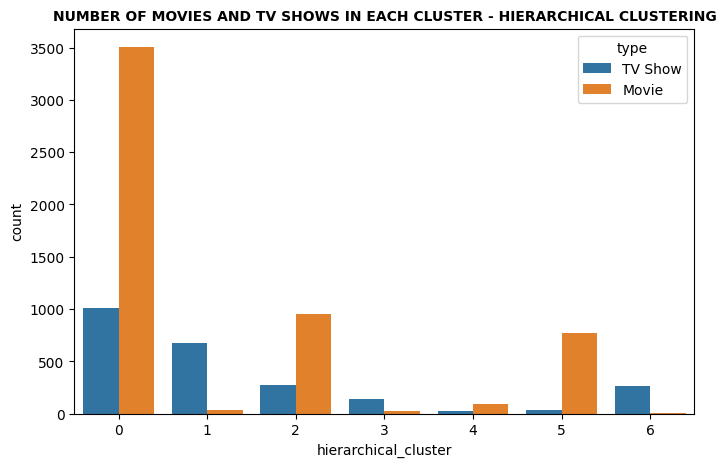

In [121]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
sns.countplot(x='hierarchical_cluster',data=dataset, hue='type')
plt.title('NUMBER OF MOVIES AND TV SHOWS IN EACH CLUSTER - HIERARCHICAL CLUSTERING',fontsize=10, fontweight='bold')

Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

In [122]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in dataset[dataset['hierarchical_cluster']==cluster_num].description.values:
      val = str(val)
      tokens = val.split()
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,background_color ='azure',stopwords = stopwords,min_font_size = 8).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (8,5))
  plt.imshow(wordcloud)
  plt.axis("off")


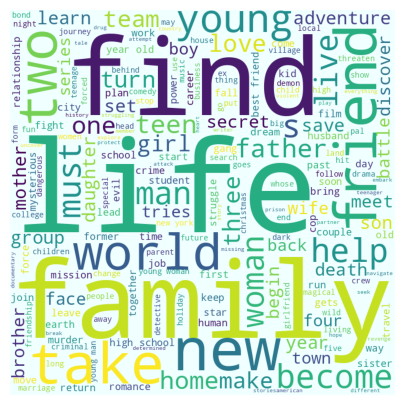

In [123]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

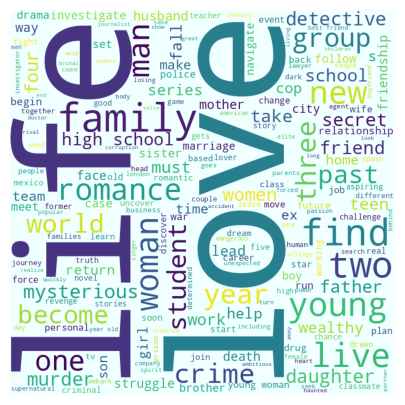

In [124]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

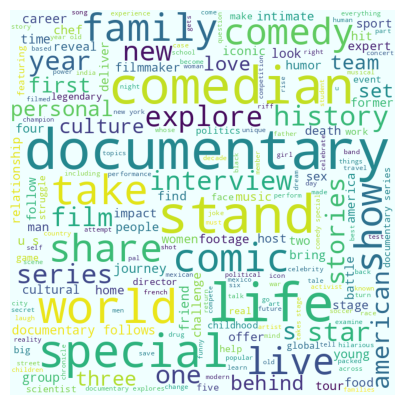

In [125]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

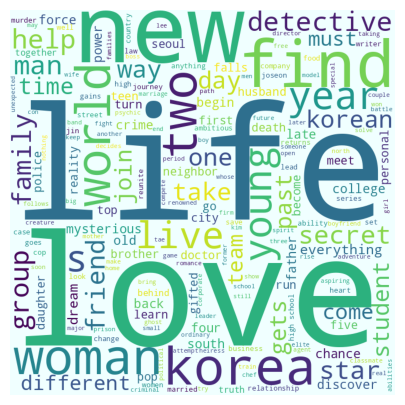

In [126]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

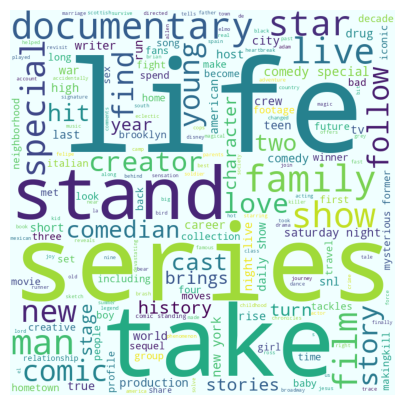

In [127]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

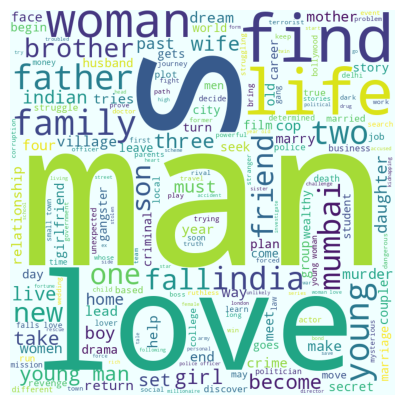

In [128]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

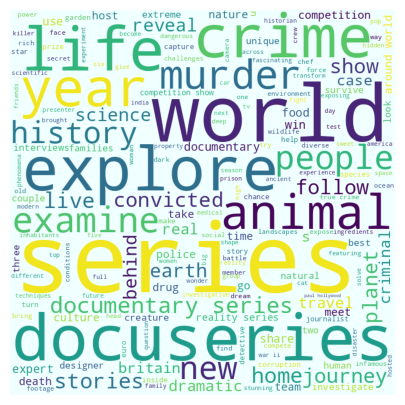

In [129]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

##**9. Building Content based recommender system:**


A content-based recommendation system is a type of recommendation system that suggests items to users based on their similarity to other items that the user has shown interest in. It uses the attributes or features of the items to determine the similarity between them.

* Based on how similar the movies and shows are, we can create a straightforward content-based recommender system.
* The recommender system needs to be able to suggest a list of similar shows that a person who has watched a show on Netflix likes.
* We can use cosine similarity to determine the shows' similarity scores.
* By dividing the dot product of the two vectors by their magnitude values, the similarity between A and B can be calculated. Simply put, the angle between two vectors decreases as the cosine similarity score increases.

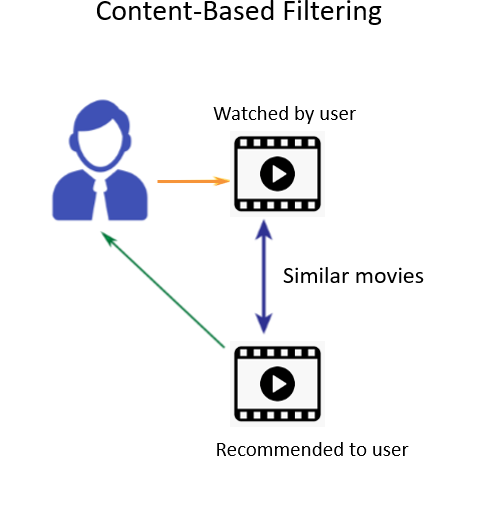

In [215]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [216]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
dataset['description'] = dataset['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(dataset['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17901)

In [217]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [226]:
#We are using cosine similarity over tf-idf because:
#Cosine similarity handles high dimensional sparse data better.
cosine_sim

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

In [219]:
indices = pd.Series(dataset.index, index=dataset['title']).drop_duplicates()

In [221]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return dataset['title'].iloc[movie_indices]



In [223]:
dataset['title'][1:70]

1                                                  7:19
2                                                 23:59
3                                                     9
4                                                    21
5                                                    46
                            ...                        
65                                              13 Sins
66                                                 13TH
67    13TH: A Conversation with Oprah Winfrey & Ava ...
68                                            14 Blades
69                                           14 Cameras
Name: title, Length: 69, dtype: object

In [225]:
get_recommendations( 'A Man Called God',cosine_sim)

752              Barely Lethal
4477            Ninja Assassin
4901                     Polar
7475                       War
5930    Suzzanna: Buried Alive
6622             The Love Guru
5160            Rencor tatuado
61            12 Years Promise
4258              Mr. Sunshine
4966     Pretty Little Stalker
Name: title, dtype: object

# **Conclusion**

In this project, we tackled a text clustering problem in which we had to categorize and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are not.

* There were approximately 7787 records and 11 attributes in the dataset.
* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).
* It was discovered that Netflix hosts more movies than television shows on its platform, and the total number of shows added to Netflix is expanding at an exponential rate. Additionally, most of the shows were made in the United States.
* The attributes were chosen as the basis for the **clustering of the data: cast, country, genre, director, rating, and description** The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.
* **10000 attributes** in total were created by **TFIDF vectorization**.
The problem of dimensionality was dealt with through the **use of Principal Component Analysis (PCA). Because 3000 components were able to account for more than 80% of the variance**, the total number of components was limited to 3000.
* Utilizing the **K-Means Clustering algorithm**, we first constructed clusters, and the **optimal number of clusters was determined to be 6**. The **elbow method and Silhouette score analysis** were used to get this.
* The **Agglomerative clustering algorithm** was then used to create clusters, and the **optimal number of clusters was determined to be 7**. This was obtained after visualizing the **dendrogram**.
* The similarity matrix generated by applying **cosine similarity** was used to construct a **content-based recommender system**. The user will receive ten recommendations from this recommender system based on the type of show they watched.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***